EN3160 Image Processing and Computer Vision 
------------------------------------------------------
__Assignment 02:__ Image Fitting and Alignment
------------------------------------------------------

# Question 01

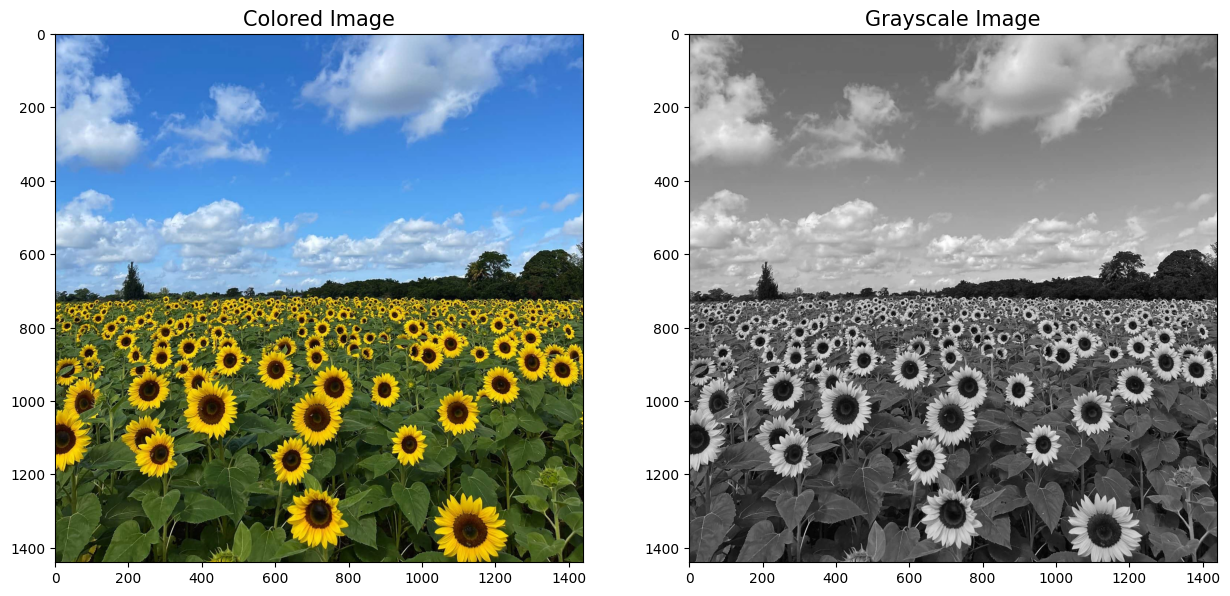

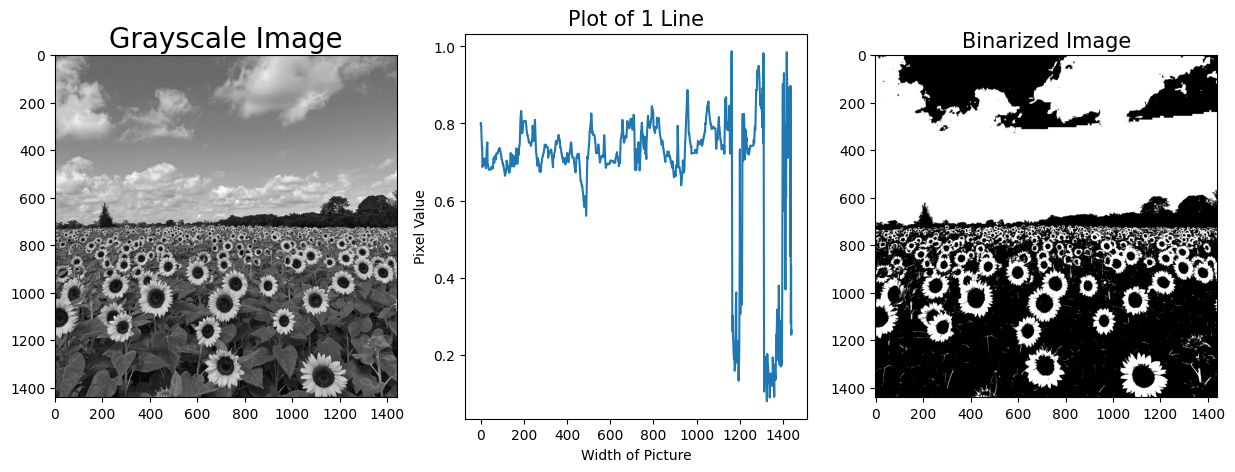

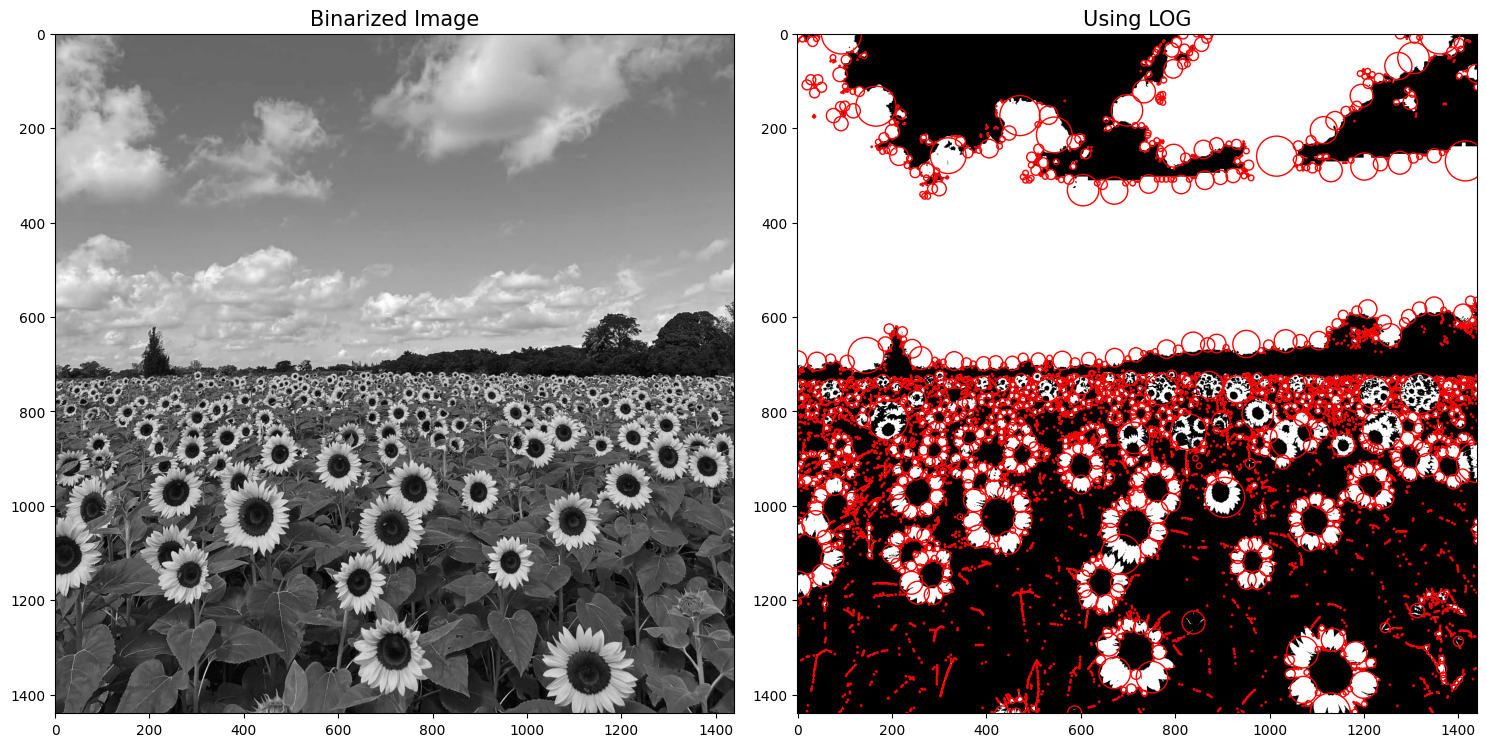

Largest Circle Parameters - Center: (471.0, 173.0), Radius: 30.0


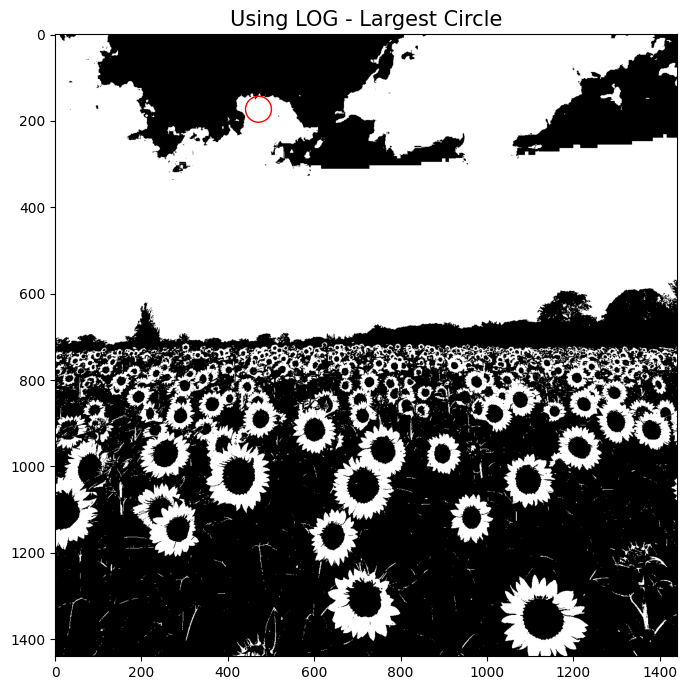

In [23]:
# Imports

%matplotlib inline
import cv2 as cv
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

sample = imread('images/the_berry_farms_sunflower_field.jpeg')
sample_g = rgb2gray(sample)
fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(sample)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = sample_g > 0.5
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(sample_g,cmap='gray')
ax[1].plot(sample_g[600])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(sample_b,cmap='gray')

from skimage.feature import blob_dog, blob_log, blob_doh
fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].set_title('Binarized Image',fontsize=15)
ax[0].imshow(sample_g,cmap='gray')
blobs = blob_log(sample_b, max_sigma=30, threshold=0.01)
ax[1].imshow(sample_b, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))
ax[1].set_title('Using LOG',fontsize=15)
plt.tight_layout()
plt.show() 

if len(blobs) > 0:
    largest_blob = max(blobs, key=lambda x: x[2])  # The third value in each blob tuple is the area
    y, x, radius = largest_blob

    # Print the parameters of the largest circle
    print(f"Largest Circle Parameters - Center: ({x}, {y}), Radius: {radius}")

    # Plot the image and draw the largest circle
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.imshow(sample_b, cmap='gray')
    ax.add_patch(plt.Circle((x, y), radius, color='r', fill=False))
    ax.set_title('Using LOG - Largest Circle', fontsize=15)
    plt.tight_layout()
    plt.show()
else:
    print("No blobs (circles) were detected in the image.")




# Question 02

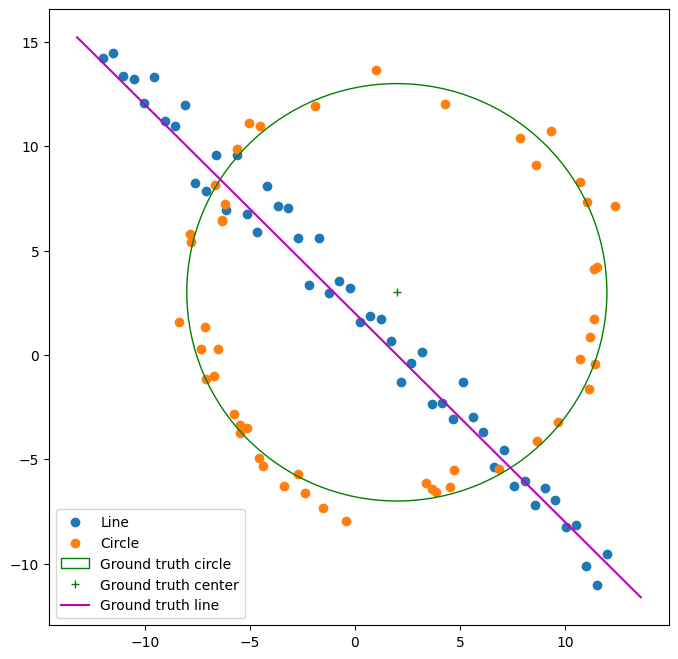

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Define the number of data points
N = 100

# Split N into half to generate equal points for the circular and linear patterns
half_n = N // 2

# Parameters for the circular pattern
circle_radius = 10
circle_center_x, circle_center_y = 2, 3  # Center coordinates
circle_noise_std = circle_radius / 16
circle_angles = np.random.uniform(0, 2 * np.pi, half_n)
circle_noise = circle_noise_std * np.random.randn(half_n)
circle_x, circle_y = circle_center_x + (circle_radius + circle_noise) * np.cos(circle_angles), \
                    circle_center_y + (circle_radius + circle_noise) * np.sin(circle_angles)
circle_data = np.hstack((circle_x.reshape(half_n, 1), circle_y.reshape(half_n, 1)))

# Parameters for the linear pattern
line_noise_std = 1.0
line_slope, line_intercept = -1, 2
line_x = np.linspace(-12, 12, half_n)
line_noise = line_noise_std * np.random.randn(half_n)
line_y = line_slope * line_x + line_intercept + line_noise
line_data = np.hstack((line_x.reshape(half_n, 1), line_y.reshape(half_n, 1)))

# Combine both circular and linear data points to create the final dataset
all_data = np.vstack((circle_data, line_data))

# Create a figure and axis for visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot the points from the linear pattern
ax.scatter(line_data[:, 0], line_data[:, 1], label='Line')

# Scatter plot the points from the circular pattern
ax.scatter(circle_data[:, 0], circle_data[:, 1], label='Circle')

# Ground truth circle: Add a green circle representing the true circle center and radius
circle_ground_truth = plt.Circle((circle_center_x, circle_center_y), circle_radius, color='g', fill=False,
                                 label='Ground truth circle')
ax.add_patch(circle_ground_truth)

# Mark the ground truth circle center with a green cross
ax.plot(circle_center_x, circle_center_y, '+g', label='Ground truth center')

# Plot the ground truth line
x_min, x_max = ax.get_xlim()
x_values = np.array([x_min, x_max])
y_values = line_slope * x_values + line_intercept
plt.plot(x_values, y_values, color='m', label='Ground truth line')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

# Question 03

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


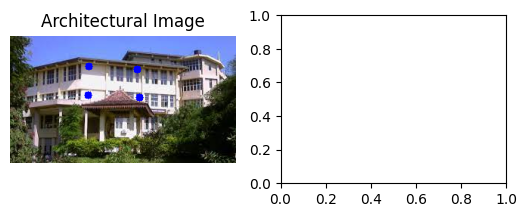

In [25]:
import cv2 as cv
import numpy as np

number_of_points = 4
n = 0
architectural_points = np.empty((number_of_points,2))

# Load your architectural image and flag image
flag_image = cv.imread('images/SLflag.jpg', cv.IMREAD_COLOR)
architectural_image = cv.imread('images/entc.jpg', cv.IMREAD_COLOR)

# Mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    architectural_points = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        architectural_points[n] = (x,y)
        n += 1

# Getting the mouse points of the base image
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
param = [architectural_points, architectural_image]
cv.setMouseCallback('Image',draw_circle, param)
while(1):
    cv.imshow('Image', architectural_image)
    if n == number_of_points:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

# Define the corresponding points on the flag image
# These points should form a rectangle to match the planar surface
flag_points = np.array([[0, 0], [flag_image.shape[1], 0], [flag_image.shape[1], flag_image.shape[0]], [0, flag_image.shape[0]]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(flag_points, architectural_points)

# Warp the flag image to match the architectural image using the homography
flag_warped = cv.warpPerspective(flag_image, homography_matrix, (architectural_image.shape[1], architectural_image.shape[0]))

# Blend the two images (you can adjust the blending method and parameters)
blended_image = cv.addWeighted(architectural_image, 1, flag_warped, 0.7, 0)

# Display the result
cv.imshow('Superimposed Image', blended_image)
cv.waitKey(0)
cv.destroyAllWindows()

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(architectural_image, cv.COLOR_BGR2RGB))
plt.title('Architectural Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(flag, cv.COLOR_BGR2RGB))
plt.title('Flag')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(flag_warped)
plt.title('Warped Flag')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(superimposed_image, cv.COLOR_BGR2RGB))
plt.title('Superimposed Image')
plt.axis('off')


In [ ]:
corners = [] def mouse_click(event, x, y, flags, params): if event == cv.EVENT_LBUTTONDOWN: corners.append([x,y]) ims = ["001.jpg", "002.jpg"] for i in range(2): im = cv.imread(ims[i]) background_image=cv.cvtColor(im, cv.COLOR_BGR2RGB) image1=cv.imread(ims[i]) cv.imshow("Wadham College", im) corners = [] cv.setMouseCallback("Wadham College", mouse_click), cv.waitKey(0), cv.destroyAllWindows() flag_image = cv.imread("flag.png") pts_architecture = np.array(corners, dtype=np.float32) pts_flag = np.array([[0, 0], [flag_image.shape[1], 0], [flag_image.shape[1], flag_image.shape[0]], [0, flag_image.shape[0]]], dtype=np.float32) homography_matrix, _ = cv.findHomography(pts_flag, pts_architecture) flag_warped = cv.warpPerspective(flag_image, homography_matrix, (background_image.shape[1], background_image.shape[0])) flag=cv.cvtColor(flag_warped, cv.COLOR_RGB2BGR) alpha = 0.5 composite_image = cv.addWeighted(im, 1, flag_warped, alpha, 0, dst=background_image) composite=cv.cvtColor(composite_image, cv.COLOR_BGR2RGB) fig, ax = plt.subplots(1,3,figsize=(15,15)) ax[0].imshow(cv.cvtColor(image1,cv.COLOR_BGR2RGB)), ax[0].set_title("Building Image")
ax[1].imshow(cv.cvtColor(flag_warped,cv.COLOR_BGR2RGB)), ax[1].set_title("Transformed Flag") ax[2].imshow(cv.cvtColor(composite_image,cv.COLOR_BGR2RGB)), ax[2].set_title("Superimposed Image") plt.show()